# Implement Linear Regression (Gradient Descent) with 1 variable

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:

# Using Gradient-descent minimize Loss function of LR

# beta = [a, b]
# y_pred = a + b * x

# 1) Choose random betas
# 2) Calculate the gradient of the loss function
# 3) Choose the next set of betas by moving in the opposite direction of gradient
# 4) If the change of the loss function is equal (or most likely close) to metric_change - STOP
#    In other cases continue from step 2.


In [3]:
class LinearRegression:
    def __init__(self, lr=0.1, w=[4, 4], max_iter=3000, metric_change=0.000001):
        self.lr = lr
        self.w0 = w[0]
        self.w1 = w[1]
        self.max_iter = max_iter
        self.metric_change = metric_change
        return
    
    def gradient(self):
        return (
            2 * np.mean(self.w0 + self.w1*self.x_train - self.y_train),
            2 * np.mean((self.w0 + self.w1*self.x_train - self.y_train) * self.x_train) 
        )
    
    def update_weights(self):
        pD = self.gradient()
        self.w0 = self.w0 - self.lr * pD[0]
        self.w1 = self.w1 - self.lr * pD[1]
        self.coef_ = [self.w1]
        self.intercept_ = self.w0
        return
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
        self.L = np.mean((self.predict(x_train) - y_train)**2)

        for _ in range(self.max_iter):
            self.update_weights()
            new_loss = np.mean((self.w0 + self.w1*x_train - y_train)**2)
            temp_change = self.L - new_loss
            if temp_change < 0:
                raise ValueError('Bad learning rate, loss function increases')
            self.L = new_loss
            if temp_change < self.metric_change:
                break
        return self
        
    def predict(self, x_test):
        y_pred = self.w0 + self.w1 * x_test
        return y_pred
    
    def score(self, x_test, y_test):
        total_var = ((y_test - y_test.mean()) ** 2).sum()
        unexplained_var = ((y_test - self.predict(x_test)) ** 2).sum()
        r2 = 1 - unexplained_var/total_var
        return r2

# Implement Ridge Regression (Gradient Descent) for unlimited number of variables

In [4]:
class RidgeRegression:
    def __init__(self, lr=0.1, lmb=1, max_iter=3000, metric_change=0.000001):
        self.lr = lr
        self.lmb = lmb
        self.max_iter = max_iter
        self.metric_change = metric_change
        return

    def gradient(self):
        l = self.x_train.shape[0]
        k = self.w.shape[0]
        pD = []
        for i in range(k):
            pD_i = 2 * np.mean((self.x_train.dot(np.transpose(self.w)) - self.y_train)*self.x_train[:,i])
            if i != 0:
                pD_i += (2*self.lmb/l) * self.w[i]

            pD.append(pD_i)
        return np.array(pD)
    
    def update_weights(self):
        pD = self.gradient()
        self.w = self.w - self.lr * pD
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        return

    def fit(self, x_train, y_train):
        l = x_train.shape[0]

        self.x_train = np.concatenate([np.ones(l).reshape((-1, 1)), x_train], axis=1)
        self.y_train = y_train
        self.w = np.ones(self.x_train.shape[1]) * 4
        
        self.L = np.mean((self.predict(x_train) - self.y_train)**2)

        
        for _ in range(self.max_iter):
            self.update_weights()
            new_loss = np.mean((self.x_train.dot(self.w.T) - self.y_train)**2)
            temp_change = self.L - new_loss
            if temp_change < 0:
                raise ValueError('Bad learning rate or lambda, loss function increases')
            self.L = new_loss
            if temp_change < self.metric_change:
                break
        return self

    def predict(self, x_test):
        l = x_test.shape[0]
        x_test = np.concatenate([np.ones(l).reshape((-1, 1)), x_test], axis=1)
        y_pred = x_test.dot(self.w.T)
        return y_pred

    def score(self, x_test, y_test):
        total_var = ((y_test - y_test.mean()) ** 2).sum()
        unexplained_var = ((y_test - self.predict(x_test)) ** 2).sum()
        r2 = 1 - unexplained_var/total_var
        return r2

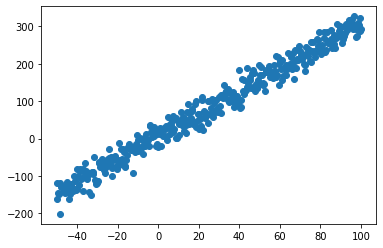

In [5]:
x = np.linspace(-50, 100, 400)
x_matrix = x.reshape(-1, 1)
a0 = 5
b0 = 3
# x
y = a0 + b0*x  + np.random.normal(0, 20, 400)
# y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
xr_train, xr_test, yr_train, yr_test = train_test_split(x_matrix, y, test_size=0.2, random_state=0)
plt.scatter(x, y)

In [6]:
linR = LinearRegression(lr=0.0002)
linR.fit(x_train, y_train)
print('Linear')
print('Slope:       ', linR.coef_[0])
print('Intercept:   ', linR.intercept_)
print('Train score: ', linR.score(x_train, y_train))
print('Test score:  ', linR.score(x_test, y_test))

Linear
Slope:        3.029867563461872
Intercept:    5.670528133655271
Train score:  0.9758903684447849
Test score:   0.9747020155350653


In [7]:
ridge = RidgeRegression(lr=0.0002, lmb=1)
ridge.fit(xr_train, yr_train)
print('Ridge')
print('Slope:       ', ridge.coef_)
print('Intercept:   ', ridge.intercept_)
print('Train score: ', ridge.score(xr_train, yr_train))
print('Test score:  ', ridge.score(xr_test, yr_test))

Ridge
Slope:        [3.02986306]
Intercept:    5.670607005186037
Train score:  0.9758903764448027
Test score:   0.9747019551939075
